# Import libraries

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


# load dataset

In [78]:
df = pd.read_csv("C:\\Users\\AL3MD\\Desktop\\archive\\vgsales.csv")

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Explore dataset

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [80]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [81]:
df.apply(lambda col: col.nunique())

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

# Clean and fill dataset

In [82]:
df["Year"]=df["Year"].fillna(df["Year"].mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [83]:
df["Publisher"]=df["Publisher"].fillna("NoPublisher")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [84]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# Data analysis

### Which best five Publishers had received the copies sales overall?


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Publisher     579 non-null    object 
 1   Rank          579 non-null    int64  
 2   Year          579 non-null    float64
 3   NA_Sales      579 non-null    float64
 4   EU_Sales      579 non-null    float64
 5   JP_Sales      579 non-null    float64
 6   Other_Sales   579 non-null    float64
 7   Global_Sales  579 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 36.3+ KB


<AxesSubplot:xlabel='Global_Sales', ylabel='Publisher'>

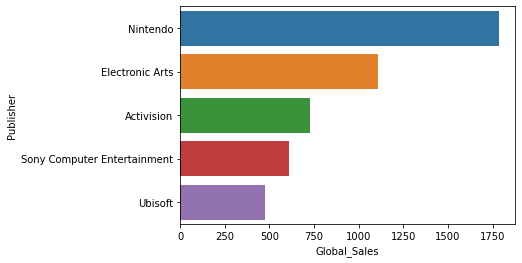

In [85]:
## Publishers with the most copies sold & show fig
df_MP = df.groupby(['Publisher']).sum().sort_values(by=['Global_Sales'], ascending=False).reset_index()

df_MP.info()


sns.barplot(x='Global_Sales',y='Publisher', data=df_MP , order= df_MP['Publisher'].iloc[0:5])



### Which best five games had received the most copies sales overall? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11493 entries, 0 to 11492
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          11493 non-null  object 
 1   Rank          11493 non-null  int64  
 2   Year          11493 non-null  float64
 3   NA_Sales      11493 non-null  float64
 4   EU_Sales      11493 non-null  float64
 5   JP_Sales      11493 non-null  float64
 6   Other_Sales   11493 non-null  float64
 7   Global_Sales  11493 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 718.4+ KB


<AxesSubplot:xlabel='Global_Sales', ylabel='Name'>

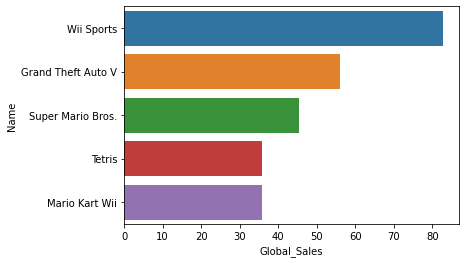

In [86]:
## video games with the most copies sold & show fig

df_MN = df.groupby(['Name']).sum().sort_values(by=['Global_Sales'], ascending=False).reset_index()

df_MN.info()

sns.barplot(x='Global_Sales',y='Name', data=df_MN , order= df_MN['Name'].iloc[0:5])




### Which best five genres had received the copies sales overall? 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Genre         12 non-null     object 
 1   Rank          12 non-null     int64  
 2   Year          12 non-null     float64
 3   NA_Sales      12 non-null     float64
 4   EU_Sales      12 non-null     float64
 5   JP_Sales      12 non-null     float64
 6   Other_Sales   12 non-null     float64
 7   Global_Sales  12 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 896.0+ bytes


<AxesSubplot:xlabel='Global_Sales', ylabel='Genre'>

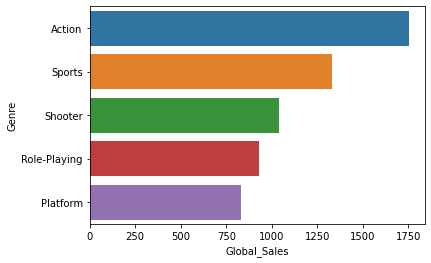

In [87]:
## Genres with the most copies sold & show fig

df_MG = df.groupby(['Genre']).sum().sort_values(by=['Global_Sales'], ascending=False).reset_index()

df_MG.info()

sns.barplot(x='Global_Sales',y='Genre', data=df_MG , order= df_MG['Genre'].iloc[0:5])



# preprocessing for modeling

In [88]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [89]:
## which data we can change from string to number or drop it
df.apply(lambda col: col.nunique())

Rank            16598
Name            11493
Platform           31
Year               40
Genre              12
Publisher         579
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [90]:
##drop name,Publisher and platform
df.drop(columns=['Platform','Name','Publisher'],inplace=True)
df.head()

,Rank,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,2006.0,Sports,41.49,29.02,3.77,8.46,82.74
1,2,1985.0,Platform,29.08,3.58,6.81,0.77,40.24
2,3,2008.0,Racing,15.85,12.88,3.79,3.31,35.82
3,4,2009.0,Sports,15.75,11.01,3.28,2.96,33.00
4,5,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37


In [91]:
##change genre from string to number 
df = pd.get_dummies(df,drop_first=False)
df.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,1,2006.0,41.49,29.02,3.77,8.46,82.74,0,0,0,0,0,0,0,0,0,0,1,0
1,2,1985.0,29.08,3.58,6.81,0.77,40.24,0,0,0,0,1,0,0,0,0,0,0,0
2,3,2008.0,15.85,12.88,3.79,3.31,35.82,0,0,0,0,0,0,1,0,0,0,0,0
3,4,2009.0,15.75,11.01,3.28,2.96,33.00,0,0,0,0,0,0,0,0,0,0,1,0
4,5,1996.0,11.27,8.89,10.22,1.00,31.37,0,0,0,0,0,0,0,1,0,0,0,0


In [92]:
## change year from float to int
df = df.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Rank                16598 non-null  int32
 1   Year                16598 non-null  int32
 2   NA_Sales            16598 non-null  int32
 3   EU_Sales            16598 non-null  int32
 4   JP_Sales            16598 non-null  int32
 5   Other_Sales         16598 non-null  int32
 6   Global_Sales        16598 non-null  int32
 7   Genre_Action        16598 non-null  int32
 8   Genre_Adventure     16598 non-null  int32
 9   Genre_Fighting      16598 non-null  int32
 10  Genre_Misc          16598 non-null  int32
 11  Genre_Platform      16598 non-null  int32
 12  Genre_Puzzle        16598 non-null  int32
 13  Genre_Racing        16598 non-null  int32
 14  Genre_Role-Playing  16598 non-null  int32
 15  Genre_Shooter       16598 non-null  int32
 16  Genre_Simulation    16598 non-null  int3

# split Data

In [93]:
X = df.drop('Global_Sales',axis=1)
X.shape

(16598, 18)

In [94]:
y= df['Global_Sales']
y.shape

(16598,)

In [95]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [96]:
X_train

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
11199,11201,2006,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
11648,11650,2009,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
14120,14122,1998,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
14933,14936,1998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12119,12121,2002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,9227,2014,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
13123,13125,2015,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9845,9847,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10799,10801,2006,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [97]:
y_train

11199    0
11648    0
14120    0
14933    0
12119    0
        ..
9225     0
13123    0
9845     0
10799    0
2732     0
Name: Global_Sales, Length: 13278, dtype: int32

# Modeling

### linear regression

In [98]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

LinearRegression()

In [99]:
y_prediction =  LR.predict(X_test)
y_prediction

array([ 0.32262943,  0.16913343,  0.12908276, ...,  0.26443707,
        0.15937248, 29.10840224])

In [100]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.9624617944374784
mean_sqrd_error is== 0.07808848227012168
root_mean_squared error of is== 0.2794431646509209


### Random Forest Regression

In [101]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [102]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [103]:
y_pred = regressor.predict(X_test)

In [104]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0034668674698795166
Mean Squared Error: 0.00468840361445783
Root Mean Squared Error: 0.06847191843710697


### Decision Tree Regression

In [105]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [106]:
y_pred = regressor.predict(X_test)


In [107]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.004819277108433735
Mean Squared Error: 0.012048192771084338
Root Mean Squared Error: 0.10976425998969035
